### Long Short-Term Memory - Airline Passenger Traffic Dataset

#### Time-Series Forecasting Problem

In [1]:
# import required libraries
# change kernal -> change kernal -> Python (tf_env)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col="Month")
# we parse, to automatically recognize date as dates

In [3]:
# prit first 5 columns
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.shape

(144, 1)

In [5]:
# Preprocessing the Data
# Handling missing values if any
df.ffill(inplace=True)  

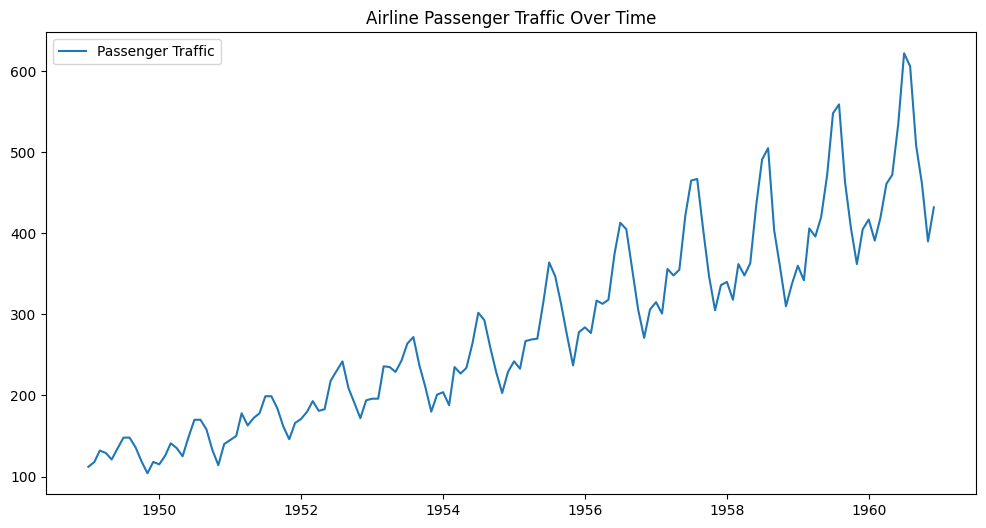

In [6]:
# Visualiza the dataset
plt.figure(figsize=(12, 6))
plt.plot(df, label="Passenger Traffic")
plt.legend()
plt.title("Airline Passenger Traffic Over Time")
plt.show()

In [7]:
# Scaling or Normalizing the Data
# LSTMs work best with values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

In [8]:
# Creating Sequences for LSTM
# Converting to a supervised learning problem: Define input (X) and output (y)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12 # Use past 12 months to predict next month
X, y = create_sequences(df_scaled, seq_length)

In [9]:
# Split into train and test sets
train_size = int(len(X) * 0.8)  # represents 80%
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#### Build and Train LSTM Model

In [11]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)  # Output layer
])
model.compile(optimizer='adam', loss='mse')

C:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sequential()- initialize a sequential model
##### Firt LSTM -
- It is the first LSTM layer, has 50 units(neurons)
- Its activation is 'relu'
- return_sequences - means returns output at every time step
- input_shape - defines shape of input data
##### Second LSTM -
- another LSTM layer with 50 units, not return_sequences
##### Dense Layer -
- It is the Output layer, It has 1 unit, bcoz we are predicting a single value
##### Compile the model
- 'adam' is a popular optimizer, and 'mse' is a common loss fn in regression

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                   validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 0.1122 - val_loss: 0.3583
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0901 - val_loss: 0.2782
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0515 - val_loss: 0.1700
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0260 - val_loss: 0.0396
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0143 - val_loss: 0.0204
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - val_loss: 0.0470
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0149 - val_loss: 0.0480
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0122 - val_loss: 0.0243
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0080 - val_loss: 0.0207
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0079 - val_loss: 0.0213
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0065 - val_loss: 0.0259
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0070 - val_loss: 0.0205


- model.fit() - trains the model
- epochs - model go through entire dataset 50 times during training, its epoch
- batch_size - data is processed in batches of 16 samples at a time during training
- verbose - displays the progress of training

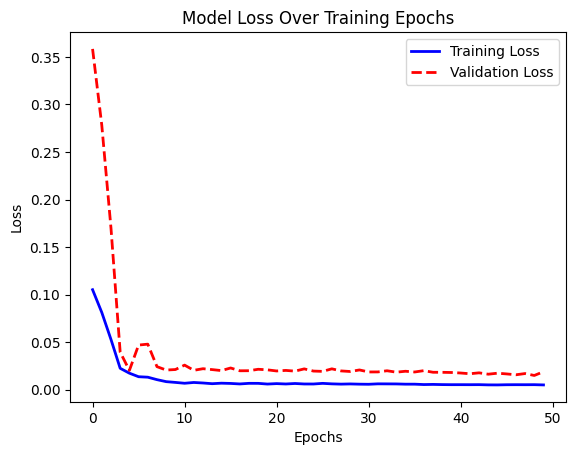

In [13]:
# Plot training loss

plt.plot(history.history['loss'], label='Training Loss', color='blue', 
        linestyle='-',linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red',
        linestyle='--', linewidth=2)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss Over Training Epochs")
plt.show()

##### Training Loss: 
- How Well the model performs on the training data
##### Validation Loss:
- How well the model performs on unseen validation data

#### Make Predictions and Evaluate Model

In [14]:
# make predictions
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


In [15]:
# Convert predictions back to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

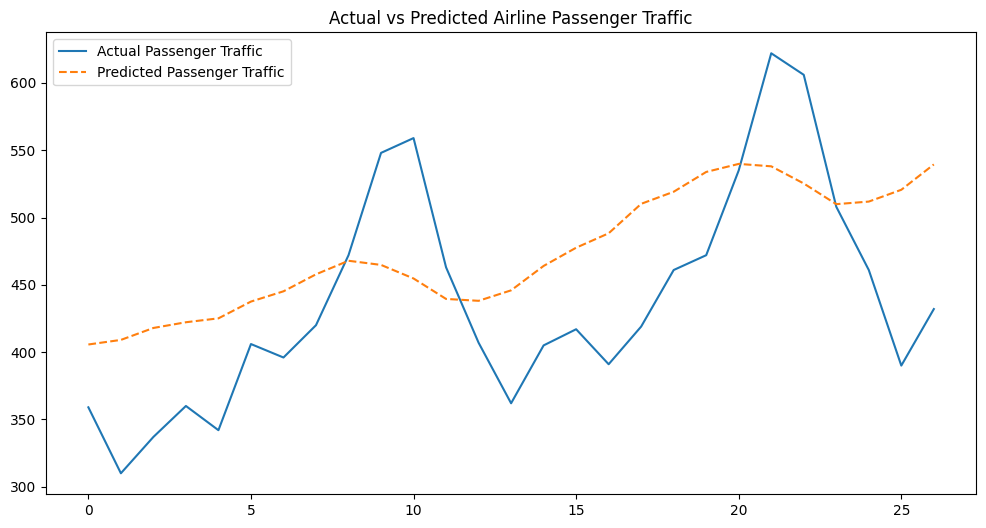

In [16]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label = "Actual Passenger Traffic")
plt.plot(y_pred_actual, label = "Predicted Passenger Traffic", linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted Airline Passenger Traffic")
plt.show()